In [1]:
from fuzzynumber import *
import dbpso

In [2]:
def minimizingFunction(space, c=3, d=500, r=0.8, c3=300, h=1.5, a=100, b=1.22):
    T = space[0]
    return (c*d/r) + (c3/T) + (h*d*T*(a*r+(b*r-1)*d))/(2*(a+b*d)*r)

def minimizingFunctionForm2(space, c=3, d=500, r=0.8, c3=300, h=1.5, a=100, b=1.22):
    t1 = space[0]
    T = space[1]
    k = a+b*d
    ans = (c*k*t1 + c3 + h*(0.5*(r*k-d)*t1**2 + d*T*(T-t1) + 0.5*d*(t1**2-T**2)))/T
    return ans

In [3]:
solution = dbpso.DBPSO(minimizingFunction, Maxgen=100, N = 100, dim = 1, minx = [0.2], maxx = [2])
sol = solution.solve()
T = sol[0][0]
Z = sol[1]
k = 100 + 1.22*500
t1 = T*500/(0.8*k)
Q = 500*(T-t1)
print("Minimizing in T\nt1 = %f | T = %f | k = %f | Q = %f | Z = %f" %(t1, T, k, Q, Z))

Minimizing in T
t1 = 2.275261 | T = 2.584696 | k = 710.000000 | Q = 154.717741 | Z = 2107.106097


Intuitionistic Fuzzy Demand is  ITFN <460.000000, 500.000000, 600.000000>; <400.000000, 500.000000, 660.000000>
Int. Fuzzy t1 is  ITFN <1.919687, 2.249549, 2.415577>; <1.764450, 2.249549, 2.716292>
Int. Fuzzy Production Rate is  ITFN <661.200000, 710.000000, 832.000000>; <588.000000, 710.000000, 905.200000>
Int. Fuzzy Inventory Lvl is  ITFN <64.358709, 152.969323, 381.480228>; <-64.321795, 152.969323, 522.085084>
Int. Fuzzy Cost is  ITFN <1933.737751, 2107.121422, 2510.010113>; <1691.924777, 2107.121422, 2764.928952>


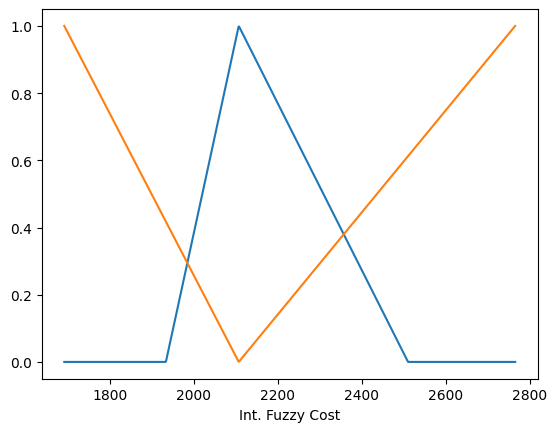

Int. Fuzzy Minimizing in T and defuzzifying
d = 515.000000 | t1 = 2.226775 | T = 2.555488 | k = 728.300000 | Q = 189.434940 | Z = 2166.135910


In [4]:
d = ITFN(460, 400, 500, 600, 660) #itfn of the form (a1, a2, b, c1, c2)
print("Intuitionistic Fuzzy Demand is ", d)
def func(space):
    itff = minimizingFunction(space, d=d)
    return itff.defuzz()

solution = dbpso.DBPSO(func, Maxgen=100, N = 100, dim = 1, minx = [0.1], maxx = [3])
sol = solution.solve()
T = sol[0][0]
Z = minimizingFunction([T], d=d)
k = 100 + 1.22*d
t1 = 500*T/(0.8*k)
print("Int. Fuzzy t1 is ", t1)
print("Int. Fuzzy Production Rate is ", k)
Q = d*(T-t1)
print("Int. Fuzzy Inventory Lvl is ", Q)
print("Int. Fuzzy Cost is ", Z)
zplt = Z.plot(xlabel='Int. Fuzzy Cost')
plt.show()
print("Int. Fuzzy Minimizing in T and defuzzifying\nd = %f | t1 = %f | T = %f | k = %f | Q = %f | Z = %f"
      %(d.defuzz(), t1.defuzz(), T, k.defuzz(), Q.defuzz(), Z.defuzz()))


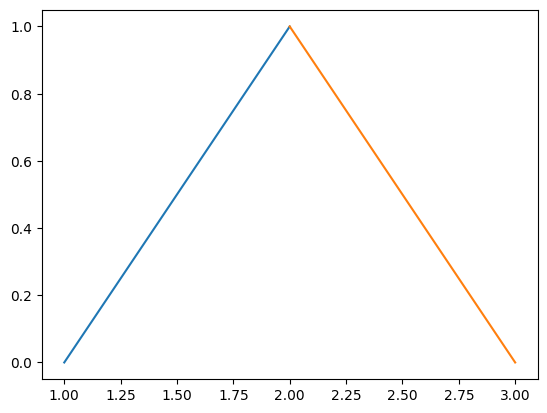

In [5]:
#INTERVAL NUMBERS
f = TFN(1, 2, 3)
g = TFN(0, 1, 2)
N = 10000
h = 1/N
L = []
for i in range(N+1):
    alpha = i*h
    x1 = f.alphaCut(alpha)
    L.append([x1.lowLim, x1.upLim, alpha])
plt.plot([i[0] for i in L], [i[2] for i in L])
plt.plot([i[1] for i in L], [i[2] for i in L])
plt.show()
 

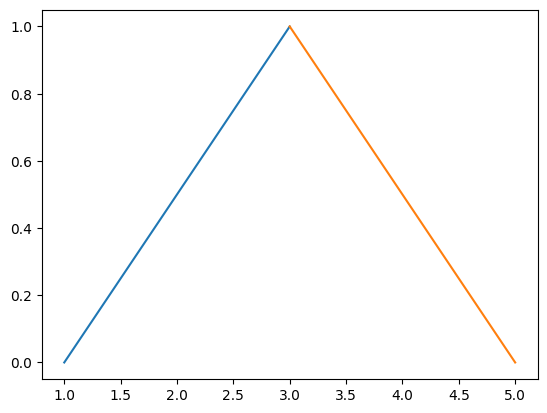

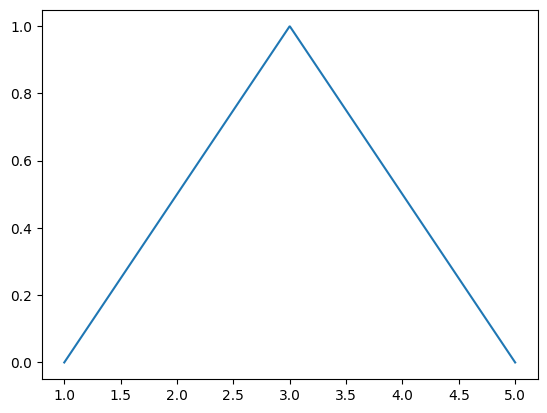

In [6]:
L = []
for i in range(N+1):
    alpha = i*h
    x1 = f.alphaCut(alpha)
    x2 = g.alphaCut(alpha)
    z = x1+x2
    L.append([z.lowLim, z.upLim, alpha])
plt.plot([i[0] for i in L], [i[2] for i in L])
plt.plot([i[1] for i in L], [i[2] for i in L])
plt.show()
s = f + g
fig = s.plot(deev=False)
plt.show()

INTNUM [2.0, 8.0]
INTNUM [2.000138634240753, 7.999445501473227]
INTNUM [2.000277278091233, 7.998891041380034]
INTNUM [2.0004159315521046, 7.998336619717752]
INTNUM [2.000554594624035, 7.997782236483721]
INTNUM [2.0006932673076907, 7.997227891675274]
INTNUM [2.0008319496037372, 7.996673585289751]
INTNUM [2.000970641512841, 7.996119317324486]
INTNUM [2.001109343035669, 7.995565087776819]
INTNUM [2.0012480541728865, 7.995010896644083]
INTNUM [2.001386774925161, 7.994456743923621]
INTNUM [2.001525505293159, 7.993902629612764]
INTNUM [2.001664245277546, 7.993348553708856]
INTNUM [2.0018029948789895, 7.99279451620923]
INTNUM [2.001941754098156, 7.992240517111228]
INTNUM [2.0020805229357115, 7.991686556412184]
INTNUM [2.0022193013923233, 7.991132634109442]
INTNUM [2.0023580894686583, 7.990578750200334]
INTNUM [2.0024968871653828, 7.9900249046822065]
INTNUM [2.002635694483164, 7.989471097552391]
INTNUM [2.002774511422669, 7.988917328808233]
INTNUM [2.0029133379845643, 7.988363598447066]
INTNUM

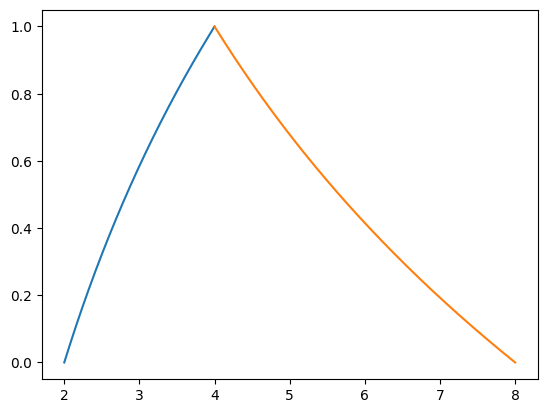

In [7]:
L = []
for i in range(N+1):
    alpha = i*h
    x1 = f.alphaCut(alpha)
    z = 2**x1
    print(z)
    L.append([z.lowLim, z.upLim, alpha])
plt.plot([i[0] for i in L], [i[2] for i in L])
plt.plot([i[1] for i in L], [i[2] for i in L])
plt.show()

RUNNNING!
1274.4116847113198 LRFN <center=568.0, alpha=39.04, beta=97.60000000000001>
Fuzzy t1 is  LRFN <center=2.243682543505845, alpha=0.3290015268121551, beta=0.16559544483225228>
Fuzzy Production Rate is  LRFN <center=710.0, alpha=48.8, beta=122.0>
Fuzzy Inventory Lvl is  LRFN <center=152.57041295839736, alpha=88.37953765950783, beta=227.91499867897255>
Fuzzy Cost is  LRFN <center=2107.129178750092, alpha=173.32269171007226, beta=402.81596271268313>


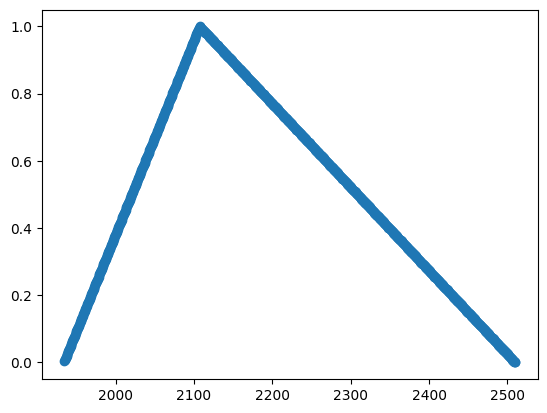

Fuzzy Minimizing in T and defuzzifying
d = 520.000048 | t1 = 2.189214 | T = 2.548823 | k = 734.400058 | Q = 199.082242 | Z = 2183.627230


In [8]:
def leftFunction(x):
    return 1-x
def rightFunction(x):
    return 1-x

def minimizingFunction(space, c=3, d=500, r=0.8, c3=300, h=1.5, a=100, b=1.22):
    T = space[0]
    return (c*d/r) + (c3/T) + (h*d*T*(a*r+(b*r-1)*d))/(2*(a+b*d)*r)

d = LRFN(leftFunction, rightFunction, 500, 40, 100)
def func(space):
    itff = minimizingFunction(space, d=d)
    return itff.defuzz()

print("RUNNNING!")

solution = dbpso.DBPSO(func, Maxgen=100, N = 100, dim = 1, minx = [0.1], maxx = [3])
sol = solution.solve()
T = sol[0][0]
Z = minimizingFunction([T], d=d)
k = 100 + 1.22*d
t1 = 500*T/(0.8*k)
print(500*T, 0.8*k)
print("Fuzzy t1 is ", t1)
print("Fuzzy Production Rate is ", k)
Q = d*(T-t1)
print("Fuzzy Inventory Lvl is ", Q)
print("Fuzzy Cost is ", Z)
zplt = Z.toFuzzySet(Z.center-Z.alpha, Z.center+Z.beta).plot()
plt.show()
print("Fuzzy Minimizing in T and defuzzifying\nd = %f | t1 = %f | T = %f | k = %f | Q = %f | Z = %f"
      %(d.defuzz(), t1.defuzz(), T, k.defuzz(), Q.defuzz(), Z.defuzz()))

Fuzzy Demand is  TFN <460.000000, 500.000000, 600.000000>
Fuzzy t1 is  TFN <1.929669, 2.261246, 2.428138>
Fuzzy Production Rate is  TFN <661.200000, 710.000000, 832.000000>
Fuzzy Inventory Lvl is  TFN <64.693368, 153.764749, 383.463888>
Fuzzy Cost is  TFN <1933.605446, 2107.110710, 2510.144418>


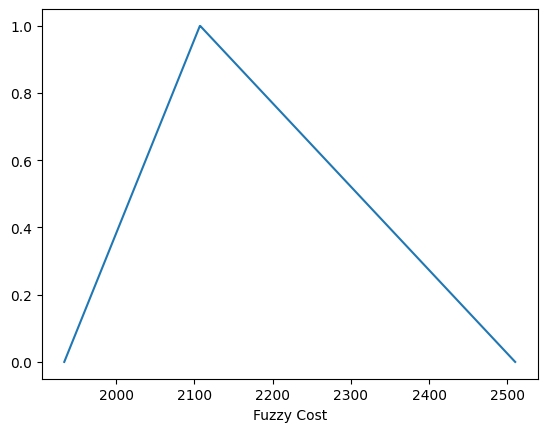

Fuzzy Minimizing in T and defuzzifying
d = 515.000000 | DOF = 0.304348 | t1 = 2.220075 | T = 2.568776 | k = 728.300000 | Q = 188.921688 | Z = 2164.492821


In [9]:
d = TFN(460, 500, 600)
print("Fuzzy Demand is ", d)

def func(space):
    tff = minimizingFunction(space, d=d)
    return tff.yRankingIndex()

solution = dbpso.DBPSO(func, Maxgen=100, N = 100, dim = 1, minx = [0.1], maxx = [3])
sol = solution.solve()
T = sol[0][0]
Z = minimizingFunction([T], d=d)
k = 100 + 1.22*d
t1 = 500*T/(0.8*k)
print("Fuzzy t1 is ", t1)
print("Fuzzy Production Rate is ", k)
Q = d*(T-t1)
print("Fuzzy Inventory Lvl is ", Q)
print("Fuzzy Cost is ", Z)
zplt = Z.plot(xlabel='Fuzzy Cost')
plt.show()
print("Fuzzy Minimizing in T and defuzzifying\nd = %f | DOF = %f | t1 = %f | T = %f | k = %f | Q = %f | Z = %f"
      %(d.yRankingIndex(), d.dof(), t1.yRankingIndex(), T, k.yRankingIndex(), Q.yRankingIndex(), Z.yRankingIndex()))
